# Stable Diffusion with Hugging Face

2024, Denis Rothman   



# Image Generation

Defining the model and prompt to generate and display the images.

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

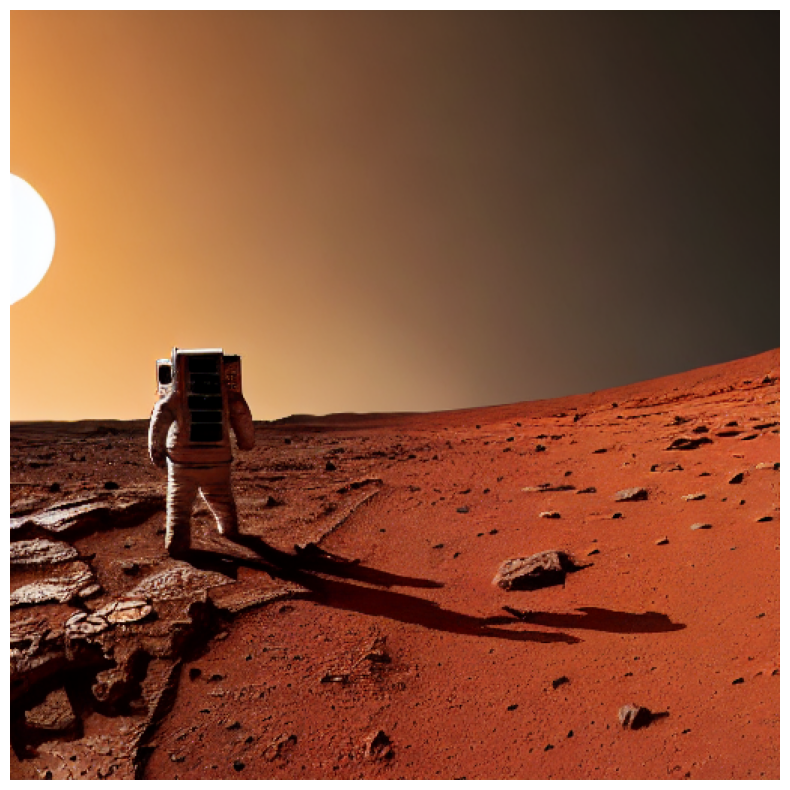

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from diffusers import StableDiffusionPipeline
import torch

# Ensure TensorFlow mixed precision is disabled for compatibility
if tf.keras.mixed_precision.global_policy().name != "float32":
    tf.keras.mixed_precision.set_global_policy("float32")

# Load the Stable Diffusion pipeline from Hugging Face
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

# Define your text prompt
prompt = "photograph of an astronaut walking on Mars towards a sunset"

# Generate an image using the text prompt
with torch.autocast("cuda"):
    image = pipeline(prompt, guidance_scale=7.5).images[0]

# Function to plot the generated image
def plot_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Plot the generated image
plot_image(image)


An example prompt of a "photograph of an astronaut on Mars with a sunset" with a batch of 3 images.

In [5]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

# A more complex prompt.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

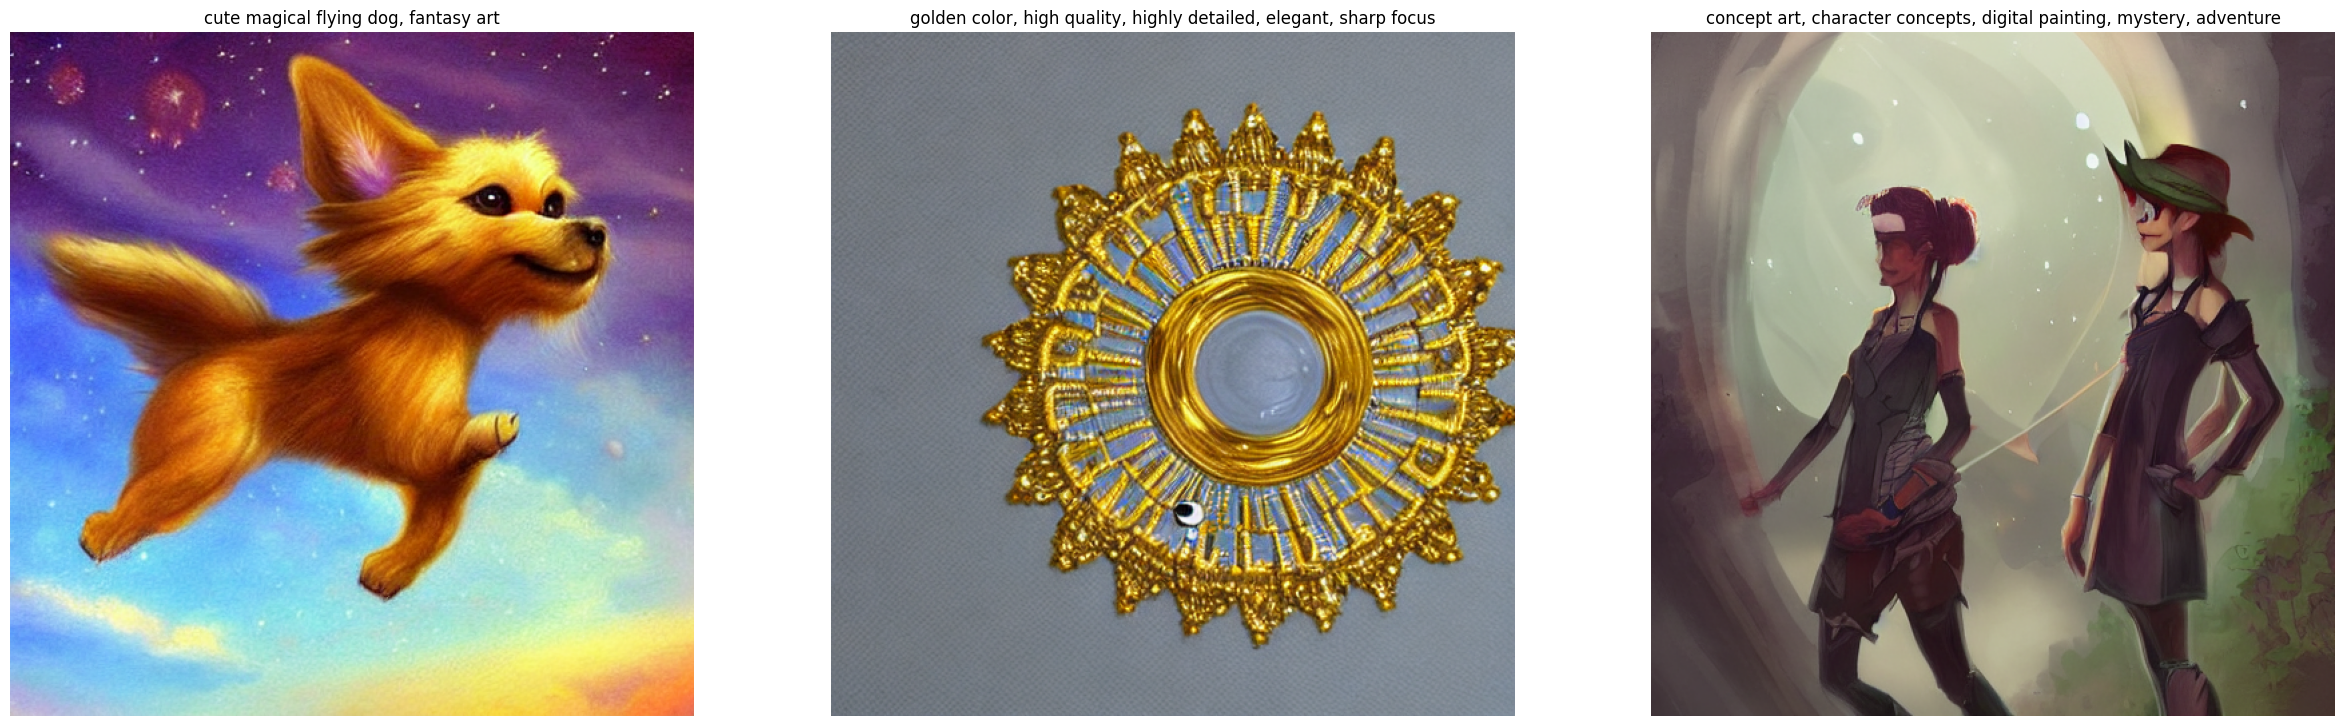

In [8]:
# Define your prompts
prompts = [
    "cute magical flying dog, fantasy art",
    "golden color, high quality, highly detailed, elegant, sharp focus",
    "concept art, character concepts, digital painting, mystery, adventure"
]

# Generate images for each prompt
images = []
with torch.autocast("cuda"):
    for prompt in prompts:
        images.append(pipeline(prompt, guidance_scale=7.5).images[0])

# Function to plot the generated images
def plot_images(images, prompts):
    plt.figure(figsize=(30, 10))
    for i, image in enumerate(images):
        ax = plt.subplot(1, len(images), i + 1)
        ax.set_title(prompts[i], fontsize=12)
        plt.imshow(image)
        plt.axis("off")
    plt.show()

# Plot the generated images
plot_images(images, prompts)